In [1]:
import dtw as r_dtw
import spft as spft
from os.path import join
# from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
from scipy.stats import linregress
from scipy.stats import zscore
from tslearn.metrics import dtw, dtw_path, soft_dtw_alignment
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [2]:
def get_dist_2_diag(t_ref, path):
    """
    Compute the euclidean distance between each point on the path and the diagonal
    Returns array of distances for each point in path (not normalized in any way)
    """
    diag_len = t_ref.shape[0] #lengths are the same, so we just use one
    diag_coord = np.arange(0,diag_len)
    diag_coords = np.vstack([diag_coord,diag_coord]).T #now represents diagonal
    dist_2_diag = []
    # _path = np.array(path)
    for el in path:
        # print(el)
        _sub_mat = diag_coords - el
        _sub_mat_sign = np.sign(_sub_mat[:,1]) # sign based on y-axis, tells us which direction in time we warped
        _eucl_dist = np.sqrt(((_sub_mat)**2).sum(axis=1))
        _min_idx = np.argmin(_eucl_dist)
        dist_2_diag.append(_eucl_dist[_min_idx]*_sub_mat_sign[_min_idx])
    return np.array(dist_2_diag)

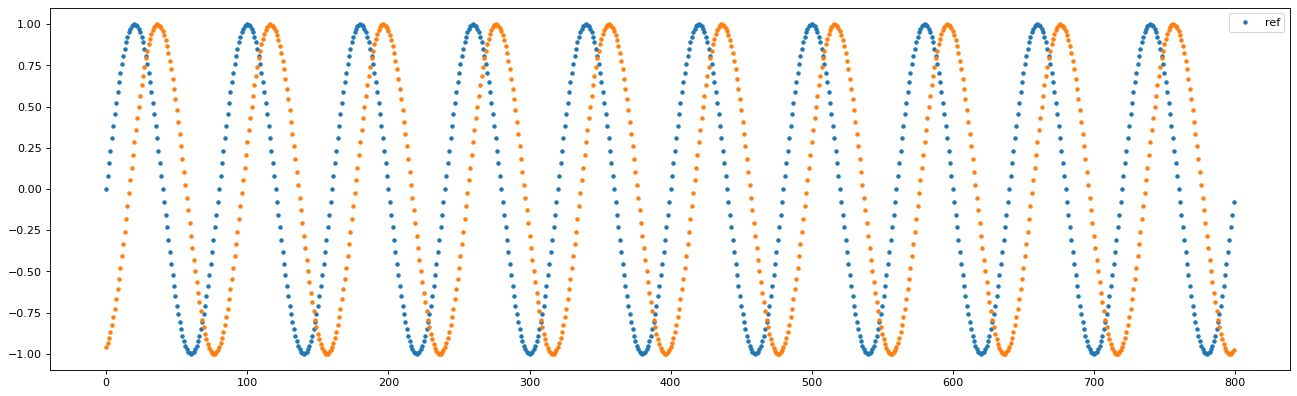

In [35]:
start_time = 0
end_time = 1
sample_rate = 200
time = np.arange(start_time, end_time, 1/sample_rate)
theta = 5
frequency = 10
amplitude = 1
t_ref = amplitude * np.sin(2 * np.pi * frequency * time) #+ amplitude*np.cos(2 * np.pi * frequency * time)**2
t_for = amplitude * np.sin(2 * np.pi * frequency * time + theta)  #+ 3*amplitude*np.cos(2 * np.pi * frequency * time-theta)**2
plt.figure(figsize=(20, 6), dpi=80)
plt.plot(t_ref,'.',label='ref')
plt.plot(t_for,'.')
plt.legend()
# plt.xlim(0,50)
# plt.xlim(100,180), plt.ylim(-1.5,1)

In [34]:
path, score = dtw_path(t_ref,t_for)
    
tw = r_dtw.dtw(t_ref,t_for, keep_internals=True, step_pattern='symmetric2') #we treat the reference as the query and the force as the target, such that we can apply the warp afterwards
dd = np.diff(path,axis=1)
d2diag = get_dist_2_diag(t_ref,path)
print(np.median(dd[dd!=0]))
print(np.median(dd))
print(np.mean(dd[dd!=0]))
print(np.mean(dd))
print("")
print(np.median(d2diag))
print(np.mean(d2diag))

2.0
2.0
1.975
1.9268292682926829

-1.4142135623730951
-1.3696177788427006


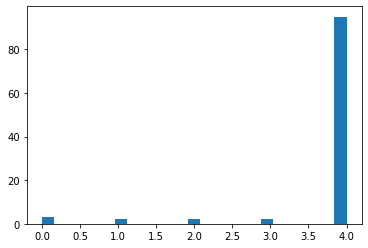

In [28]:
hh=plt.hist(dd,bins=25)

<AxesSubplot:xlabel='Index', ylabel='Query value'>

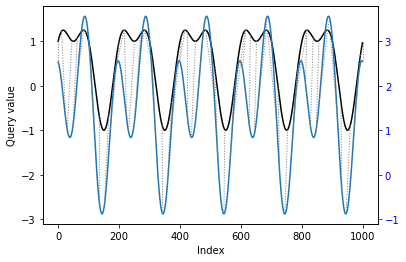

In [9]:
tw.plot(type='twoway',offset=-2)